In [33]:
import pandas as pd 

In [34]:


# Load the dataset with a different encoding
df = pd.read_csv("C:\\Users\\Ashiq\\Downloads\\Project 9 (1)\\Project 9\\HouseListings-Top45Cities.csv", encoding='ISO-8859-1')
# or use encoding='latin1'

# Display the first few rows of the dataframe
print(df.head())


      City      Price                  Address  Number_Beds  Number_Baths  \
0  Toronto   779900.0    #318 -20 SOUTHPORT ST            3             2   
1  Toronto   799999.0    #818 -60 SOUTHPORT ST            3             1   
2  Toronto   799900.0  #714 -859 THE QUEENSWAY            2             2   
3  Toronto  1200000.0         275 MORTIMER AVE            4             2   
4  Toronto   668800.0    #420 -388 RICHMOND ST            1             1   

  Province  Population  Latitude  Longitude  Median_Family_Income  
0  Ontario     5647656   43.7417   -79.3733               97000.0  
1  Ontario     5647656   43.7417   -79.3733               97000.0  
2  Ontario     5647656   43.7417   -79.3733               97000.0  
3  Ontario     5647656   43.7417   -79.3733               97000.0  
4  Ontario     5647656   43.7417   -79.3733               97000.0  


In [35]:

# Get a concise summary of the dataframe
print(df.info())

# Descriptive statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB
None
              Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.576800e+04  35768.000000  35768.000000  3.576800e+04  35768.000000   
mean   9.432963e+05      3.283661      2.532403  6.360

In [36]:
# Check for missing values
print(df.isnull().sum())

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64


In [37]:
# Assuming 'Price' column is in scientific notation
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [38]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df

# Initialize the label encoder
label_encoder = LabelEncoder()

# Columns to be label encoded
columns_to_encode = ['City', 'Address', 'Province']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column + '_Encoded'] = label_encoder.fit_transform(df[column])

# This will create new columns in the DataFrame with '_Encoded' suffix to hold the encoded values


In [39]:
# Clip Number_Beds to be within 0-10
df['Number_Beds'] = df['Number_Beds'].clip(lower=0, upper=8)

# Clip Number_Baths to be within 0-5
df['Number_Baths'] = df['Number_Baths'].clip(lower=1, upper=5)


# # Clip Price_Scaled to be within 0.0 to 0.4
# df['Price_Scaled'] = df['Price'].clip(lower=0.0, upper=0.4)





In [40]:
# Clip Price to be within the range 21,500 to 3,000,000
df['Price'] = df['Price'].clip(lower=21500, upper=2000000)


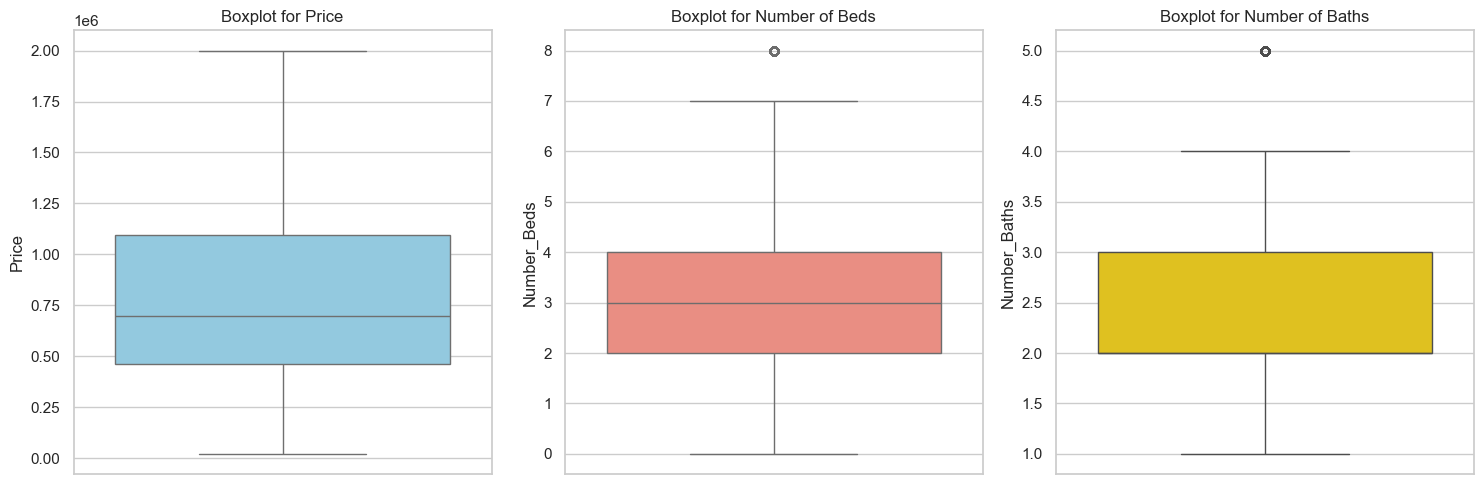

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Price', 'Number_Beds', and 'Number_Baths' columns exist in your DataFrame (df)

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Boxplot for Price
plt.subplot(1, 3, 1)
sns.boxplot(y='Price', data=df, color='skyblue')
plt.title('Boxplot for Price')

# Boxplot for Number of Beds
plt.subplot(1, 3, 2)
sns.boxplot(y='Number_Beds', data=df, color='salmon')
plt.title('Boxplot for Number of Beds')

# Boxplot for Number of Baths
plt.subplot(1, 3, 3)
sns.boxplot(y='Number_Baths', data=df, color='gold')
plt.title('Boxplot for Number of Baths')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


In [42]:
# Converting data types if necessary
df['Number_Beds'] = df['Number_Beds'].astype(int)
df['Number_Baths'] = df['Number_Baths'].astype(int)
df['Population'] = df['Population'].astype(float)  # Assuming Population might be a large number


In [43]:
print(df.columns)

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income',
       'City_Encoded', 'Address_Encoded', 'Province_Encoded'],
      dtype='object')


In [44]:
# Final look at the data
print(df.head())
print(df.info())


      City      Price                  Address  Number_Beds  Number_Baths  \
0  Toronto   779900.0    #318 -20 SOUTHPORT ST            3             2   
1  Toronto   799999.0    #818 -60 SOUTHPORT ST            3             1   
2  Toronto   799900.0  #714 -859 THE QUEENSWAY            2             2   
3  Toronto  1200000.0         275 MORTIMER AVE            4             2   
4  Toronto   668800.0    #420 -388 RICHMOND ST            1             1   

  Province  Population  Latitude  Longitude  Median_Family_Income  \
0  Ontario   5647656.0   43.7417   -79.3733               97000.0   
1  Ontario   5647656.0   43.7417   -79.3733               97000.0   
2  Ontario   5647656.0   43.7417   -79.3733               97000.0   
3  Ontario   5647656.0   43.7417   -79.3733               97000.0   
4  Ontario   5647656.0   43.7417   -79.3733               97000.0   

   City_Encoded  Address_Encoded  Province_Encoded  
0            38             1311                 6  
1            38 

In [45]:
#CHART1 
import plotly.express as px

# Assuming 'City' and 'Price' columns exist in your DataFrame (df)

# Calculate the average price for each city
average_prices = df.groupby('City')['Price'].mean().reset_index()

# Sort the cities based on average prices
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Use Plotly Express to create the bar chart
fig = px.bar(average_prices, 
             x='City', 
             y='Price', 
             color='Price',  # Color the bars by price
             color_continuous_scale=px.colors.sequential.Viridis,  # Color scale
             title='Average Real Estate Prices by City')

# Customize the layout
fig.update_layout(xaxis_title='City',
                  yaxis_title='Average Price',
                  coloraxis_colorbar=dict(title='Average Price'),
                  xaxis={'categoryorder':'total descending'})  # Optional: This ensures the bars are sorted

# Show the figure
fig.show()


In [46]:
# CHART 2

X = df[['Number_Beds', 'Number_Baths']]  # Features
y = df['Price']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





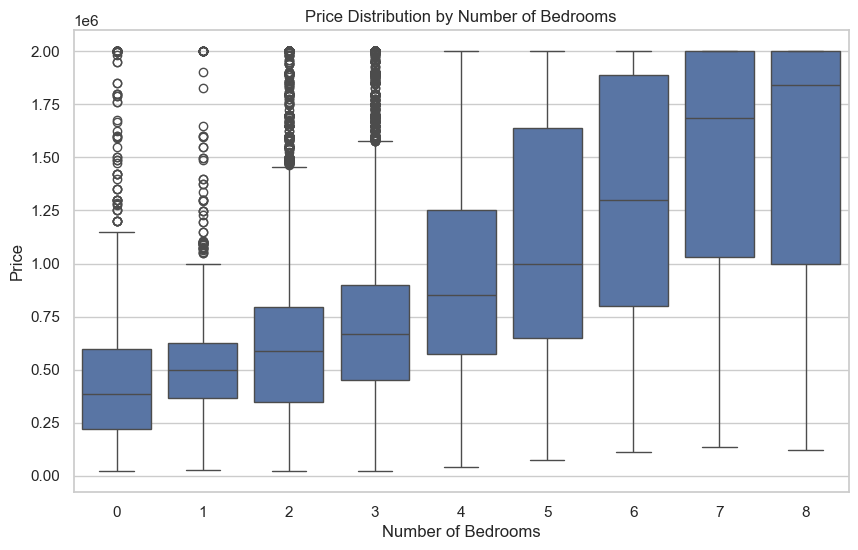

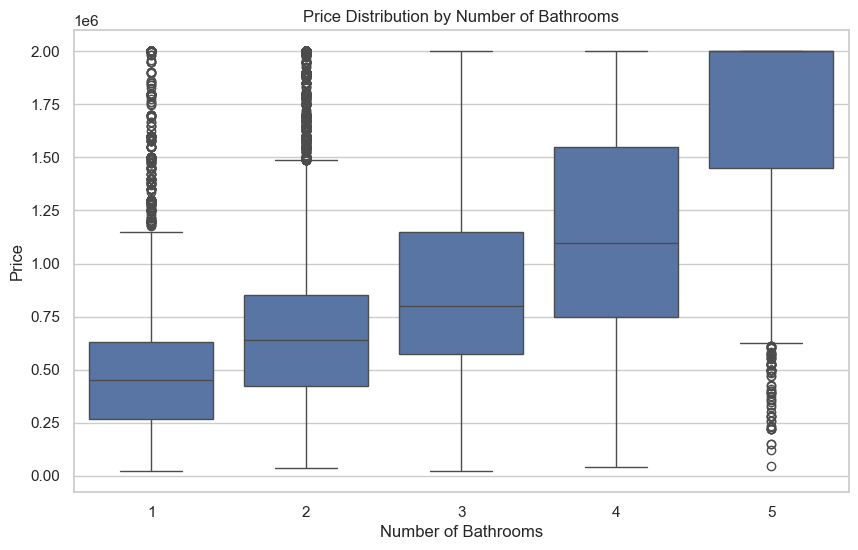

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the box plot for Number of Beds vs Price
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='Number_Beds', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Create the box plot for Number of Baths vs Price
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='Number_Baths', y='Price', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


In [48]:
# Define clipping thresholds for price based on the number of bedrooms
clip_thresholds = {
    0: (0, 1.15e6),  # For listings with 0 bedrooms
    1: (0, 1e6),     # For listings with 1 bedroom
    2: (0, 1.25e6),  # For listings with 2 bedrooms
    3: (0, 1e6),     # For listings with 3 bedrooms
}

# Apply clipping to the 'Price' column based on the number of bedrooms
for num_beds, (lower, upper) in clip_thresholds.items():
    # Identify listings that match the current number of bedrooms
    mask = df['Number_Beds'] == num_beds
    # Clip the price for these listings within the specified bounds
    df.loc[mask, 'Price'] = df.loc[mask, 'Price'].clip(lower=lower, upper=upper)

# The 'Price' values are now clipped based on the number of bedrooms and the specified thresholds.


In [49]:
# Define your conditions for each number of bathrooms with the specified bounds
clip_conditions = {
    1: {'lower_bound': 0, 'upper_bound': 1.15e6},  # For 1 bathroom
    2: {'lower_bound': 0, 'upper_bound': 1e6},     # For 2 bathrooms
    5: {'lower_bound': 1, 'upper_bound': None},    # For 5 bathrooms, no upper bound
    3: {'lower_bound': 0, 'upper_bound': 1.50e6}, 
}

# Apply clipping based on the conditions
for num_baths, bounds in clip_conditions.items():
    # Select rows where the condition applies
    mask = df['Number_Baths'] == num_baths
    
    # Apply the lower and upper bound clipping based on whether an upper bound is defined
    if bounds['upper_bound'] is not None:
        df.loc[mask, 'Price'] = df.loc[mask, 'Price'].clip(lower=bounds['lower_bound'], upper=bounds['upper_bound'])
    else:
        # When no upper bound is provided (as with 5 bathrooms), clip only with the lower bound
        df.loc[mask, 'Price'] = df.loc[mask, 'Price'].clip(lower=bounds['lower_bound'])

# The 'Price' values are now clipped based on the number of bathrooms and the specified conditions.


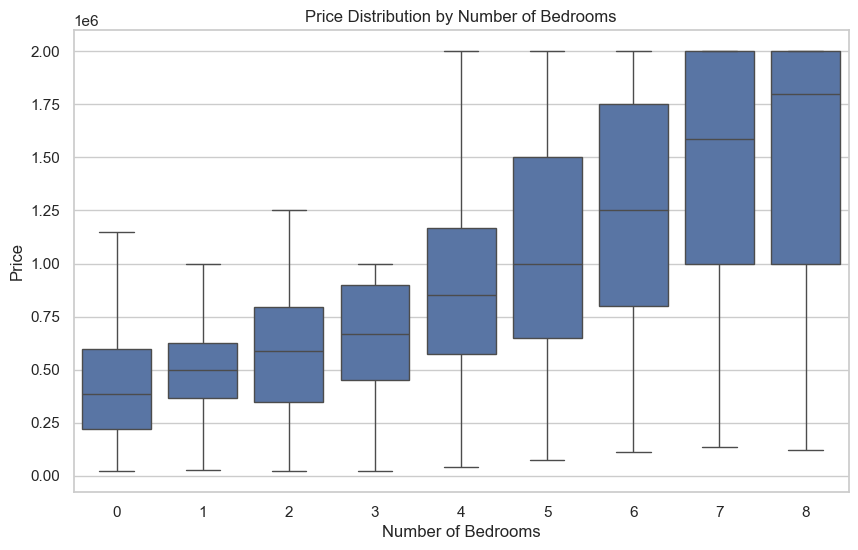

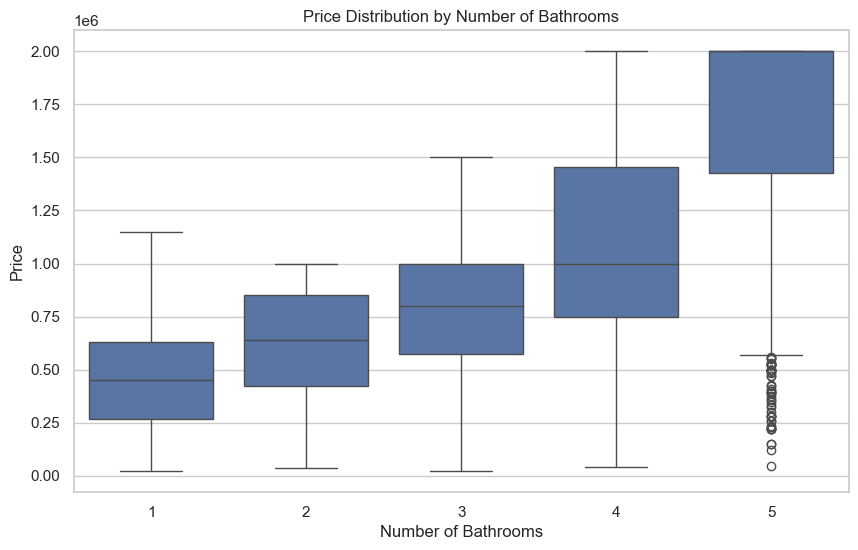

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the box plot for Number of Beds vs Price
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='Number_Beds', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Create the box plot for Number of Baths vs Price
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='Number_Baths', y='Price', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Select features (X) and target variable (y)
X = df[['Number_Beds', 'Number_Baths']]  # Features
y = df['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor Mean Squared Error: {mse_rf}')
print(f'Random Forest Regressor R^2 Score: {r2_rf}')


Random Forest Regressor Mean Squared Error: 101389055706.24892
Random Forest Regressor R^2 Score: 0.49083527634114055


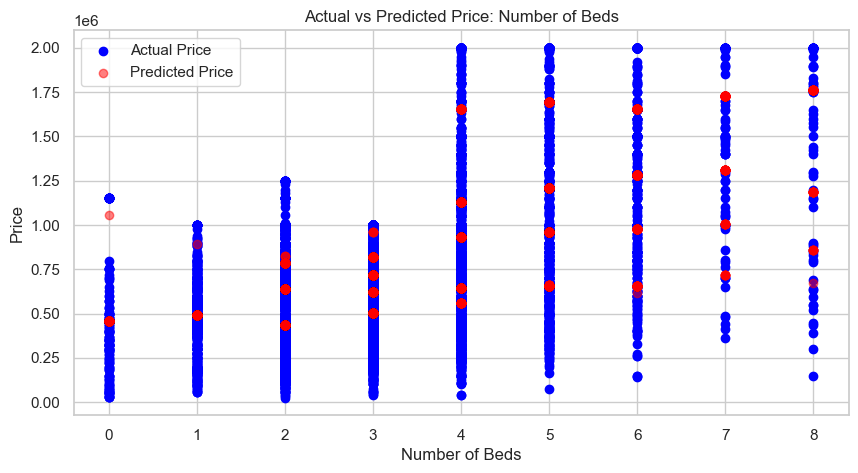

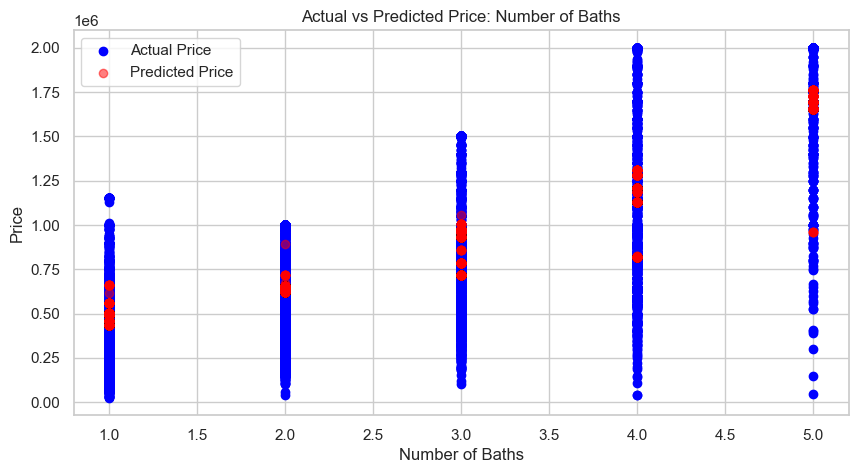

In [52]:
#CHART 2 
import matplotlib.pyplot as plt

# Assuming best_rf_model is already trained and you've defined X_test, y_test

# Make predictions on the test set using the trained model
y_pred = rf_model.predict(X_test)

# Function to create scatter plots for comparisons
def plot_actual_vs_predicted(x, y_actual, y_predicted, feature_name):
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y_actual, color='blue', label='Actual Price')
    plt.scatter(x, y_predicted, color='red', alpha=0.5, label='Predicted Price')
    plt.title(f'Actual vs Predicted Price: {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Scatter plot for Number of Beds
plot_actual_vs_predicted(X_test['Number_Beds'], y_test, y_pred, 'Number of Beds')

# Scatter plot for Number of Baths
plot_actual_vs_predicted(X_test['Number_Baths'], y_test, y_pred, 'Number of Baths')


In [53]:
# CHART 3

import pandas as pd

# Assuming 'df' is your DataFrame and it includes 'Province' and 'Price' columns
# To see average prices by province
average_prices_by_province = df.groupby('Province')['Price'].mean()
print(average_prices_by_province)



Province
Alberta                      511778.012887
British Columbia             991811.884116
Manitoba                     459518.515094
New Brunswick                393800.559497
Newfoundland and Labrador    435685.254186
Nova Scotia                  676255.703297
Ontario                      850310.146629
Quebec                       572003.359688
Saskatchewan                 393596.176423
Name: Price, dtype: float64


C:\Users\Ashiq\AppData\Local\Temp\ipykernel_21336\338305585.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



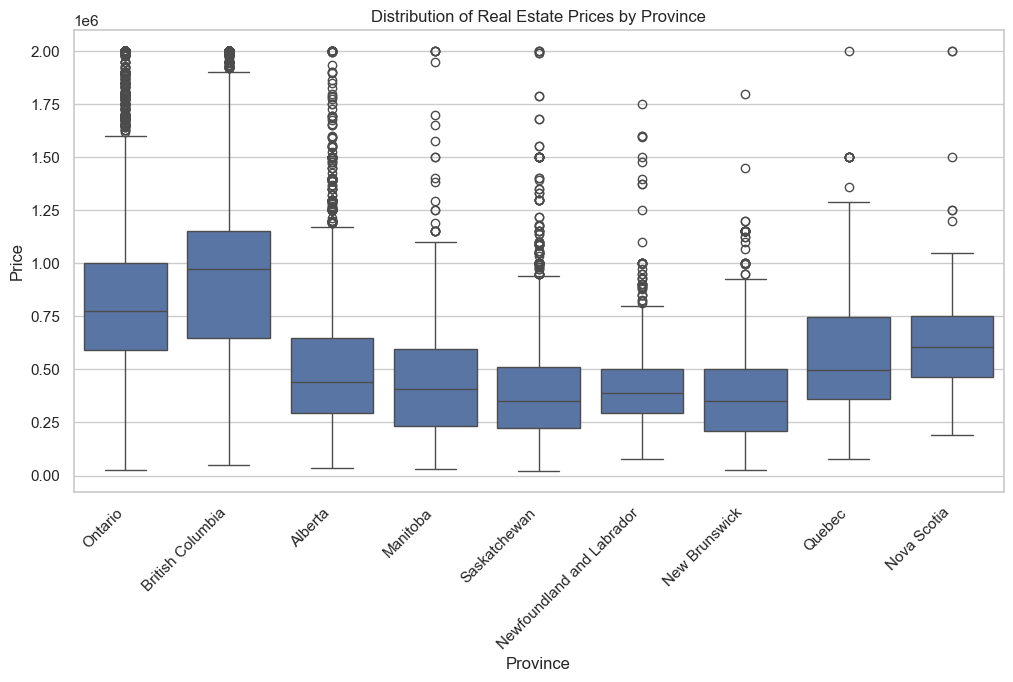

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is used for enhanced box plot aesthetics

# Set the style
sns.set(style="whitegrid")

# Creating a box plot
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
box_plot = sns.boxplot(x='Province', y='Price', data=df)

# Improve the readability of the plot
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
box_plot.set_title('Distribution of Real Estate Prices by Province')
box_plot.set_xlabel('Province')
box_plot.set_ylabel('Price')

# Show the plot
plt.show()


In [55]:
#CHART 4 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features (X) and target variable (y)
X = df[['Population', 'Price']]

# Initialize the KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels




In [56]:
import plotly.express as px

# Aggregate the data at the city level, if not already done
city_agg = df.groupby('City', as_index=False).agg({
    'Population': 'mean',  # Or however you calculate the representative population density
    'Price': 'mean'
})

# Normalize the population for the bubble size. This step is optional but helps in scaling the bubble sizes appropriately.
# Here, we directly use population as the size, but you might want to scale it depending on your dataset.
city_agg['Bubble_Size'] = city_agg['Population']

# Use Plotly Express to create the bubble chart
fig = px.scatter(city_agg, 
                 x='Population', 
                 y='Price', 
                 size='Bubble_Size', 
                 color='Price', 
                 hover_name='City',
                 color_continuous_scale=px.colors.sequential.Viridis,  # This is adjustable
                 size_max=60,  # Adjust the maximum bubble size as needed
                 title='Population Density vs Real Estate Prices per City')

# Enhance the layout
fig.update_layout(xaxis_title='Population Density',
                  yaxis_title='Average Real Estate Price',
                  coloraxis_colorbar=dict(title='Real Estate Prices'))

# Show the figure
fig.show()


In [57]:
# Assuming 'df' is your DataFrame and 'Median_Family_Income' is the column you want to clip

# Clip values of 'Median_Family_Income'
df['Median_Family_Income'] = df['Median_Family_Income'].clip(lower=0, upper=4000000)

# Now you can continue with any further analysis or visualization


In [58]:
#CHART 5 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (X) and target variable (y)
X = df[['Median_Family_Income']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R^2 Score: {r2}')


Linear Regression Mean Squared Error: 193974928066.07724
Linear Regression R^2 Score: 0.02587917445783905


In [59]:
import plotly.express as px

# Assuming df is your DataFrame containing 'Median_Family_Income' and 'Price' columns

# Create a line chart using Plotly Express
fig = px.line(df, x='Median_Family_Income', y='Price', title='Relationship between Median Family Income and Real Estate Prices')

# Add labels to axes
fig.update_xaxes(title_text='Median Family Income')
fig.update_yaxes(title_text='Real Estate Prices')

# Show the plot
fig.show()


In [60]:
#CHART6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


In [61]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude', 'Price']])


In [62]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# Assuming df is your DataFrame containing spatial features and real estate prices

# Select spatial features and real estate prices
X = df[['Latitude', 'Longitude', 'Price']]

# Initialize KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the spatial distribution of clusters
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Cluster',
                        hover_name='Price',
                        mapbox_style="carto-positron",
                        title='Spatial Distribution of Real Estate Prices Clusters')
fig.show()


In [63]:
import plotly.express as px

# Assuming df is your DataFrame containing latitude, longitude, and real estate prices

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='Longitude', y='Latitude', z='Price',
                    color='Price',  # Color points by real estate prices
                    opacity=0.7,    # Set opacity for better visibility
                    title='3D Scatter Plot of Real Estate Prices by Latitude and Longitude',
                    labels={'Longitude': 'Longitude', 'Latitude': 'Latitude', 'Price': 'Real Estate Price'})

# Show the plot
fig.show()


In [64]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Assuming df is your DataFrame containing relevant columns including 'Address' and 'Price'

# # Step 1: Prepare data
# X = df.drop(['Price', 'Address'], axis=1)  # Features matrix excluding 'Price' and 'Address'
# y = df['Price']  # Target variable

# # Step 2: Encode categorical features if necessary (not needed if they are already numeric)

# # Step 3: Train a RandomForestRegressor model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Step 4: Use the trained model to predict prices for each address
# predicted_prices = rf_model.predict(X_test)

# # Step 5: Aggregate predicted prices by address
# address_prices = pd.DataFrame({'Address': df.loc[X_test.index, 'Address'], 'Predicted_Price': predicted_prices})
# average_prices_by_address = address_prices.groupby('Address')['Predicted_Price'].mean().reset_index()

# # Display the aggregated prices by address
# print(average_prices_by_address)


In [65]:
print(df.columns)


Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income',
       'City_Encoded', 'Address_Encoded', 'Province_Encoded', 'Cluster'],
      dtype='object')


In [66]:
#CHART 8
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Population' can act as a proxy for population density
X = df[['Population']]  # Features matrix
y = df['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R^2 Score: {r2}')


Linear Regression Mean Squared Error: 197872710178.01257
Linear Regression R^2 Score: 0.006304939960025346


In [67]:
import plotly.express as px

# Preparing data for the plot
# Concatenating the test features and predictions for plotting
plot_df = X_test.copy()
plot_df['Real Price'] = y_test
plot_df['Predicted Price'] = y_pred

# Plotting
fig = px.scatter(plot_df, x='Population', y='Real Price', opacity=0.65, title='Real Estate Price Prediction')
fig.add_traces(px.line(plot_df, x='Population', y='Predicted Price', color_discrete_sequence=['red']).data)
fig.update_traces(marker_size=10)
fig.update_xaxes(title_text='Population (Density Proxy)')
fig.update_yaxes(title_text='Real Estate Price')
fig.show()


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your DataFrame containing relevant columns including 'Address_Encoded' and 'Price'

# Step 1: Prepare data
X = df['Address_Encoded']  # Features matrix excluding 'Price' and 'Address_Encoded'
y = df['Price']  # Target variable

# Step 2: Train a RandomForestRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Use the trained model to predict prices for each instance
predicted_prices = rf_model.predict(X_test)

# Step 4: Aggregate predicted prices by 'Address_Encoded'
address_prices = pd.DataFrame({'Address_Encoded': df.loc[X_test.index, 'Address_Encoded'], 'Predicted_Price': predicted_prices})
average_prices_by_address_encoded = address_prices.groupby('Address_Encoded')['Predicted_Price'].mean().reset_index()

# Display the aggregated prices by 'Address_Encoded'
print(average_prices_by_address_encoded)


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.